## Spider Line 4 Game usando Minimax com cortes Alpha-Beta e Negamax

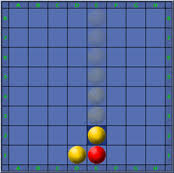

O jogo "Spider Line 4" é muito semelhante ao jodo do 4 em linha, no entanto, em vez de se puder apenas por as peças pela parte de cima do tabuleiro e elas cairem até chegarem ao fundo ou até tocarem numa outra peça, pode-se pôr em qualquer um dos 4 lados, com quase o mesmo conceito. Ou seja, inicialmente podemos colocar peças nas bordas do tabuleiro. Depois, podemos colocar peças em qualquer sítio, onde todas as posições dessa linha (à esquerda ou à direita)  ou coluna (a cima ou a baixo) estiverem ocupadas.  Por exemplo:  Como o tabuleiro tem um tamanho de 8x8 (também temos a opção de 9x9 ou 10x10), para puder colocar na posição (4,2) uma das seguintes condições deve ser satisfeita: 1) a posição (4,1) está ocupada; 2) as posições (4,8), (4,7), (4,6), (4,5), (4,4) e (4,3) estão ocupadas; 3) as posições (1,2), (2,2) e (3,2) estão ocupadas; 4) as posições (8,2), (7,2), (6,2) e (5,2) estão ocupadas. Para correr o jogo é apenas necessário clicar em "Run All", certificando-se que tem o que é necessário importado (pygame,random,time,sys,numpy,deepcopy e math).


In [2]:
import pygame
import random
import time
import sys
import numpy as np
from copy import deepcopy
import math


#--------- Graph ----------

PLAYER_1_COLOR = (242, 184, 216) 
PLAYER_2_COLOR = (128,206,225)
EMPTY_CELL_COLOR = (255, 255, 255) 
BOARD_COLOR = (189, 236, 182)
CELL_SIZE = 60


# --------- Graph ----------#

# Cores
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)


def draw_button(screen, text, button_rect, inactive_color, active_color):
    mouse = pygame.mouse.get_pos()

    if button_rect.collidepoint(mouse):
        pygame.draw.rect(screen, active_color, button_rect)
    else:
        pygame.draw.rect(screen, inactive_color, button_rect)

    font = pygame.font.Font(None, 30)
    text_render = font.render(text, 1, BLACK)
    screen.blit(text_render, (button_rect.x + 50, button_rect.y + 10))


def game_intro():
    intro = True
    global NUM_COLS, NUM_ROWS, WIDTH, HEIGHT

    while intro:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()

            if event.type == pygame.MOUSEBUTTONDOWN:
                mouse_pos = pygame.mouse.get_pos()
                # Check if a board size button is clicked
                if board_8x8_rect.collidepoint(mouse_pos):
                    NUM_COLS = 8
                    NUM_ROWS=8
                    
                elif board_9x9_rect.collidepoint(mouse_pos):
                    NUM_COLS=9
                    NUM_ROWS=9
                    
                elif board_10x10_rect.collidepoint(mouse_pos):
                    NUM_ROWS=10
                    NUM_COLS=10
                    
               # If a board size is selected, show game mode options
                if NUM_ROWS and NUM_COLS:
                    WIDTH = NUM_COLS * CELL_SIZE
                    HEIGHT = (NUM_ROWS + 1) * CELL_SIZE 
                    intro = False
            
        screen.fill(WHITE)
        # Draw the title
        font = pygame.font.Font(None, 50)
        title_text = font.render("Select Board Size", True, BLACK)
        title_pos = (SCREEN_WIDTH // 2 - title_text.get_width() // 2, SCREEN_HEIGHT // 4 - title_text.get_height() // 2)
        screen.blit(title_text, title_pos)

        # Draw board size buttons
        board_8x8_rect = pygame.Rect(100, 300, BUTTON_WIDTH, BUTTON_HEIGHT)
        draw_button(screen, '8x8', board_8x8_rect, (84,134,135), (84, 134, 183))

        board_9x9_rect = pygame.Rect(100, 350, BUTTON_WIDTH, BUTTON_HEIGHT)
        draw_button(screen, '9x9', board_9x9_rect, (143,188,148), (143, 188, 179))

        board_10x10_rect = pygame.Rect(100, 400, BUTTON_WIDTH, BUTTON_HEIGHT)
        draw_button(screen, '10x10', board_10x10_rect, (197,233,155), (197, 233, 198))

        pygame.display.update()
    
    

def intro():
    intro = True

    while intro:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()

            if event.type == pygame.MOUSEBUTTONDOWN:
                mouse_pos = pygame.mouse.get_pos()
                if easy_button_rect.collidepoint(mouse_pos):
                    game = SpiderConnectFourGame(execute_human_move,execute_negamax_move(evaluate_f1,2))
                    game.start()
                elif medium_button_rect.collidepoint(mouse_pos):
                    game = SpiderConnectFourGame(execute_human_move,execute_minimax_move(evaluate_f3,2))
                    game.start()
                elif hard_button_rect.collidepoint(mouse_pos):
                    game = SpiderConnectFourGame( execute_human_move,execute_minimax_move(evaluate_f4, 2))
                    game.start()
                elif multi_rect.collidepoint(mouse_pos):
                    game = SpiderConnectFourGame(execute_human_move, execute_human_move)
                    game.start()
                elif random_rect.collidepoint(mouse_pos):
                    game = SpiderConnectFourGame(execute_human_move, execute_random_move)
                    game.start()

        screen.fill(WHITE)
        # Draw the title
        font = pygame.font.Font(None, 50)
        title_text = font.render("Spider Line 4", True, BLACK)
        title_pos = (SCREEN_WIDTH // 2 - title_text.get_width() // 2, SCREEN_HEIGHT // 4 - title_text.get_height() // 2)
        screen.blit(title_text, title_pos)

        easy_button_rect = pygame.Rect(EASY_BUTTON_POS[0], EASY_BUTTON_POS[1], BUTTON_WIDTH, BUTTON_HEIGHT)
        draw_button(screen, 'Fácil', easy_button_rect, (0, 255, 0), (0, 200, 0))

        medium_button_rect = pygame.Rect(MEDIUM_BUTTON_POS[0], MEDIUM_BUTTON_POS[1], BUTTON_WIDTH, BUTTON_HEIGHT)
        draw_button(screen, 'Médio', medium_button_rect, (0, 0, 255), (0, 0, 200))

        hard_button_rect = pygame.Rect(HARD_BUTTON_POS[0], HARD_BUTTON_POS[1], BUTTON_WIDTH, BUTTON_HEIGHT)
        draw_button(screen, 'Difícil', hard_button_rect, (255, 0, 0), (200, 0, 0))

        multi_rect = pygame.Rect(MULTIPLAYER_POS[0], MULTIPLAYER_POS[1], BUTTON_WIDTH, BUTTON_HEIGHT)
        draw_button(screen, 'Multiplayer', multi_rect, (255, 120, 203), (255, 90, 203))

        random_rect = pygame.Rect(RANDOM_POS[0], RANDOM_POS[1], BUTTON_WIDTH, BUTTON_HEIGHT)
        draw_button(screen, 'Random', random_rect, (255, 255, 0), (200, 200, 0))
        pygame.display.update()



# Inicializa o Pygame
pygame.init()

# Configurações da tela
SCREEN_WIDTH, SCREEN_HEIGHT = 800, 800
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))

# Configurações dos botões
BUTTON_WIDTH, BUTTON_HEIGHT = 200, 50
EASY_BUTTON_POS = (500,300)
MEDIUM_BUTTON_POS = (500,350)
HARD_BUTTON_POS = (500,400)
MULTIPLAYER_POS = (100, 300)
RANDOM_POS=(100,350)


class SpiderState:
    
    def __init__(self):
        self.board = np.zeros((NUM_ROWS, NUM_COLS), dtype=int)
        self.column_heights = np.full(NUM_COLS, NUM_ROWS - 1, dtype=int)
        self.row_lengths = np.full(NUM_ROWS, NUM_COLS - 1, dtype=int)
        self.available_moves = []
        for i in range(NUM_COLS):
            for j in range(NUM_COLS):
                if i==0 or j==0 or i==NUM_COLS-1 or j==NUM_COLS-1:
                    self.available_moves.append((i,j))
            
        self.player = 1
        self.winner = -1

    def move(self, row, column): 
        # function that performs a move given the column number and returns the new state
        # do not forget to update the available moves list, column heights, pass the turn and check for winners
        #--------------------------------------------------#
        state_copy = deepcopy(self)
        if (row,column) in self.available_moves:  #se a jogada esta disponivel
            state_copy.board[row][column] = self.player
            state_copy.available_moves.remove((row,column))

        a= verificar_col(state_copy,column)
        if a != (-1,-1): #se a coluna nao estiver completa
            if (a[0],column) not in state_copy.available_moves: #a primeira casa vazia de quem vem de baixo
                state_copy.available_moves.append((a[0],column))
            if (a[1],column) not in state_copy.available_moves: #a primeira casa vazia de quem vem de cima
                state_copy.available_moves.append((a[1],column))

        a= verificar_linha(state_copy,row)
        if a != (-1,-1): #se a linha nao estiver completa
            if (row,a[0]) not in state_copy.available_moves: #a primeira casa vazia de quem vem da esquerda
                state_copy.available_moves.append((row,a[0]))
            if (row,a[1]) not in state_copy.available_moves: #a primeira casa vazia de quem vem da direita
                state_copy.available_moves.append((row,a[1]))

        state_copy.update_winner() 
        state_copy.player = 3 - self.player # update player turn
        
        return state_copy
        #--------------------------------------------------#
    def update_winner(self):
        if self.count_lines(4, 1) > 0:
            self.winner = 1
        elif self.count_lines(4, 2) > 0:
            self.winner = 2
        elif len(self.available_moves) == 0:
            self.winner = 0
        
    def get_winner(self):
        if self.count_lines(4, 1) > 0:
            return 1
        elif self.count_lines(4, 2) > 0:
            return 2
        elif len(self.available_moves) == 0:
            return 0
        return -1
    
    def check_line(self, n, player, values):
        num_pieces = sum(list(map(lambda val: val == player, values)))
        if n == 4:
            return num_pieces == 4
        if n == 3:
            num_empty_spaces = sum(list(map(lambda val: val == 0, values)))
            return num_pieces == 3 and num_empty_spaces == 1
    
    # c1) c2)
    def count_lines(self, n, player):
        num_lines = 0
        for row in range(NUM_ROWS):
            for col in range(NUM_COLS):
                if col < NUM_COLS - 3 and self.check_line(n, player, [self.board[row][col], self.board[row][col+1], self.board[row][col+2], self.board[row][col+3]]):
                    num_lines += 1
                if row < NUM_ROWS - 3 and self.check_line(n, player, [self.board[row][col], self.board[row+1][col], self.board[row+2][col], self.board[row+3][col]]):
                    num_lines += 1
                if row < NUM_ROWS - 3 and col < NUM_COLS - 3 and self.check_line(n, player, [self.board[row][col], self.board[row+1][col+1], self.board[row+2][col+2], self.board[row+3][col+3]]):
                    num_lines += 1
                if row > 2 and col > 2 and self.check_line(n, player, [self.board[row][col], self.board[row-1][col-1], self.board[row-2][col-2], self.board[row-3][col-3]]):
                    num_lines += 1
                if row < NUM_ROWS - 3 and col > 2 and self.check_line(n, player, [self.board[row][col], self.board[row+1][col-1], self.board[row+2][col-2], self.board[row+3][col-3]]):
                    num_lines += 1
                if col < NUM_ROWS - 3 and row > 2 and self.check_line(n, player, [self.board[row][col], self.board[row-1][col+1], self.board[row-2][col+2], self.board[row-3][col+3]]):
                    num_lines += 1
        return num_lines
    
    # c3)
    def central(self, player):
        points = 0
        for row in range(NUM_ROWS):
            points += 2 * (self.board[row][3] == player) # center column
            points += (self.board[row][2] == player) + (self.board[row][4] == player) # around center column
        return points
    
class SpiderConnectFourGame:
    
    def __init__(self, player_1_ai, player_2_ai):
        self.state = SpiderState()
        self.player_1_ai = player_1_ai
        self.player_2_ai = player_2_ai
        
    def start(self, log_moves = False):
        self.state = SpiderState()
 
        # --------- Graph ----------#
        pygame.init()
        screen = pygame.display.set_mode((WIDTH, HEIGHT))
        pygame.display.set_caption("Spider Line 4")
        font = pygame.font.SysFont("Arial", 80)
        clock = pygame.time.Clock()
        # --------- Graph ----------#
        
                # Desenha o tabuleiro primeiro
        screen.fill(BOARD_COLOR)
        for row in range(NUM_ROWS):
            for col in range(NUM_COLS):
                color = EMPTY_CELL_COLOR
                if self.state.board[row][col] == 1:
                    color = PLAYER_1_COLOR
                elif self.state.board[row][col] == 2:
                    color = PLAYER_2_COLOR
                pygame.draw.circle(screen, color, (int(col * CELL_SIZE + CELL_SIZE / 2), int(row * CELL_SIZE + CELL_SIZE + CELL_SIZE / 2)), int(CELL_SIZE / 2.2))
        pygame.display.flip()

        while True:             
            # Primeiro processa os movimentos do jogador
            if self.state.player == 1:
                self.player_1_ai(self)
            else:
                self.player_2_ai(self)
            
            # Depois desenha o tabuleiro
            screen.fill(BOARD_COLOR)
            for row in range(NUM_ROWS):
                for col in range(NUM_COLS):
                    color = EMPTY_CELL_COLOR
                    if self.state.board[row][col] == 1:
                        color = PLAYER_1_COLOR
                    elif self.state.board[row][col] == 2:
                        color = PLAYER_2_COLOR
                    pygame.draw.circle(screen, color, (int(col * CELL_SIZE + CELL_SIZE / 2), int(row * CELL_SIZE + CELL_SIZE + CELL_SIZE / 2)), int(CELL_SIZE / 2.2))
            pygame.display.flip()
            
            # Resto do código...

            
            print("L1:",self.state.count_lines(3, 1), " L2:", self.state.count_lines(3, 2), " C1:", self.state.central(1), " C2:", self.state.central(2))
            
            if self.state.winner != -1:
            # --------- Graph ----------#
                text = font.render(f"Player {self.state.winner} wins!", True, (0, 0, 0))
                if self.state.winner == 0:
                    text = font.render("Draw!", True, (0, 0, 0))
                screen.blit(text, (int(WIDTH / 2 - text.get_width() / 2), int(HEIGHT / 2 - text.get_height() / 2)))
                pygame.display.flip()
                pygame.time.wait(1000)
            # --------- Graph ----------#
                break
            
            # --------- Graph ----------#
            pygame.display.flip()
            clock.tick(60)
            pygame.time.wait(200)
            # --------- Graph ----------#
    
    def run_n_matches(self, n, max_time = 3600, log_moves = False):
        start_time = time.time()
        
        results = [0, 0, 0] # [draws, player 1 victories, player 2 victories]
        
        while n > 0 and time.time() - start_time < max_time:
            n -= 1
            self.start(log_moves)
            results[self.state.winner] += 1
            
        print("\n=== Elapsed time: %s seconds ===" % (int(time.time() - start_time)))
        print(f"  Player 1: {results[1]} victories")
        print(f"  Player 2: {results[2]} victories")
        print(f"  Draws: {results[0]} ")
        print("===============================")
        pygame.quit()
""" 
    Heuristic functions - e)
"""

def evaluate_f1(state):
    return state.count_lines(4, 1) - state.count_lines(4, 2)

def evaluate_f2(state):
    return 100 * evaluate_f1(state) + state.count_lines(3, 1) - state.count_lines(3, 2)

def evaluate_f3(state):
    return 100 * evaluate_f1(state) + state.central(1) - state.central(2)

def evaluate_f4(state):
    return 5 * evaluate_f2(state) + evaluate_f3(state)   

# def evaluate_f5(state):
#     return state.count_lines(3, 1) - state.count_lines(3, 2)

""" 
    Move selection methods
"""
def execute_human_move(game):
    move = None
    print("Human")
    # --------- Graph ----------#
    while move not in game.state.available_moves:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()
            elif event.type == pygame.MOUSEBUTTONDOWN:
                pos = pygame.mouse.get_pos()
                print(pos)
                column = pos[0] // CELL_SIZE  # determine which column was clicked
                row = pos[1] // CELL_SIZE  # determine which row was clicked
                move = (row-1, column)
            pygame.time.wait(30)
    game.state = game.state.move(*move)
    # --------- Graph ----------#


    
def execute_random_move(game):
    print("Random")
    move = random.choice(game.state.available_moves)
    game.state = game.state.move(*move)
    
#-------------Minimax-----------
    
def minimax(self, board, depth, alpha, beta, maximizing_player):
    # Minimax algorithm with alpha-beta pruning
    if depth == 0 or board.black_pieces == 0 or board.white_pieces == 0:
        return self.evaluate(board)
    if maximizing_player:
        max_eval = -math.inf
        for r,c in board.get_moves():
            new_board = deepcopy(board)
            new_board.make_move(r,c)
            eval = self.minimax(new_board, depth - 1, alpha, beta, False)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = math.inf
        for r,c in board.get_moves():
            new_board = deepcopy(board)
            new_board.make_move(r,c)       
            eval = self.minimax(new_board, depth - 1, alpha, beta, True)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval

def execute_minimax_move(self, board):
    # Get the best move for the current player using the Minimax algorithm
    best_move = None
    max_eval = -math.inf
    for r,c in board.get_moves():
        new_board = deepcopy(board)
        new_board.make_move(r,c)
        eval = self.minimax(new_board, self.depth, -math.inf, math.inf, False)
        if eval > max_eval:
            max_eval = eval
            best_move = (r,c)
    return best_move    
    
def execute_minimax_move(evaluate_func, depth):
    def execute_minimax_move_aux(game):
        best_move = None
        best_eval = float('-inf')
        alpha = float('-inf')
        beta = float('+inf')
        for r,c in game.state.available_moves:
            new_state = game.state.move(r,c)
            new_state_eval = minimax(new_state, depth - 1, alpha, beta, False, game.state.player, evaluate_func)
            if new_state_eval > best_eval:
                best_move = new_state
                best_eval = new_state_eval
            alpha = max(alpha, best_eval)
            if beta <= alpha:
                break
        game.state = best_move
        
    return execute_minimax_move_aux

def minimax(state, depth, alpha, beta, maximizing, player, evaluate_func):
    if depth == 0 or state.get_winner() != -1:
        return evaluate_func(state) * (1 if player == 1 else -1)
    
    if maximizing:
        max_eval = float('-inf')
        for r,c in state.available_moves:
            new_state = state.move(r,c)
            eval = minimax(new_state, depth - 1, alpha, beta, False, player, evaluate_func)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, max_eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = float('inf')
        for r,c in state.available_moves:
            new_state = state.move(r,c)
            eval = minimax(new_state, depth - 1, alpha, beta, True, player, evaluate_func)
            min_eval = min(min_eval, eval)
            beta = min(beta, min_eval)
            if beta <= alpha:
                break
        return min_eval
#-----------------------------------------------------------------
def execute_negamax_move(evaluate_func, depth):
    def execute_negamax_move_aux(game):
        best_move = None
        best_eval = float('-inf')
        for r,c in game.state.available_moves:
            new_state = game.state.move(r,c)
            new_state_eval = -negamax(new_state, depth - 1, float('-inf'), float('+inf'), game.state.player, evaluate_func)
            if new_state_eval > best_eval:
                best_move = new_state
                best_eval = new_state_eval
        game.state = best_move

    return execute_negamax_move_aux

def negamax(state, depth, alpha, beta, player, evaluate_func):
    if depth == 0 or state.winner != -1:
        return evaluate_func(state) * (1 if player == 2 else -1)

    eval = float('-inf')
    for r,c in state.available_moves:
        new_state = state.move(r,c)
        new_state_eval = -negamax(new_state, depth - 1, -beta, -alpha, 3 - player, evaluate_func)
        eval = max(eval, new_state_eval)
        alpha = max(alpha, new_state_eval)
        if beta <= alpha:
            break

    return eval

#------
def verificar_col(state_copy,column):
        baixo=0 #a primeira casa que pode estar vazia é a primeira (posição 0)
        for i in range(NUM_COLS):
            if state_copy.board[i][column]!=0: #vamos aumentando a primeira casa vazia a contar de baixo sempre que a casa tiver la alguma peça
                baixo+=1
            else: break #quando há uma casa desocupada a contagem acaba
        if baixo==NUM_COLS: #se a coluna estiver toda ocupada
            return (-1,-1)
        cima=NUM_COLS-1 #quem vem de cima começa na casa com posição =numero de colunas -1
        for i in range(NUM_COLS): 
            if state_copy.board[NUM_COLS-1-i][column]!=0: 
                cima=cima-1 #vamos tirando 1 até chegar à primeira casa vazia a contar de cima
            else: break 
        return (baixo,cima)
    
def verificar_linha(state_copy,row):
        esquerda=0
        for i in range(NUM_COLS):
            if state_copy.board[row][i]!=0:
                esquerda+=1
            else: break 
        if esquerda==NUM_COLS:
            return (-1,-1)
        direita=NUM_COLS-1
        for i in range(NUM_COLS):
            if state_copy.board[row][NUM_COLS-1-i]!=0:
                direita= direita-1
            else: break 
        return (esquerda,direita)    
game_intro()
intro()

SystemExit: 